In [1]:
# Importing libraries we might need

import pandas as pd
import json, requests
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
from sklearn.pipeline import make_pipeline
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [29]:
# Reading the World Bank csv data, we need to make some modifications to just bring in the data we want, which is the year and inflation value.

inflation=pd.read_csv("https://raw.githubusercontent.com/joesellis/joesellis.github.io/main/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_3469540.csv", skiprows=4, encoding='latin-1')
inflation

# We have a lot of unnecessary data included

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.032258,1.073966,3.643045,3.121868,3.991628,5.836688,5.555556,3.873375,5.215560,6.311080,3.361391,3.225288,2.999948,1.869489,2.280372,4.044021,2.883604,3.315247,3.656365,2.529129,3.397787,3.608024,5.392568,8.955987,-2.135429,2.078141,4.316297,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.598394,15.224099,11.216477,14.238055,12.526893,15.069850,15.066512,14.461591,12.139918,11.567524,10.983863,13.006566,13.891972,12.563443,12.522254,12.558202,12.457914,17.678100,16.167612,13.135661,14.852815,12.288591,9.706586,10.249599,7.495259,7.819865,8.601485,5.840354,8.763752,7.449700,5.023421,8.558038,8.898164,8.450775,12.566645,8.954218,5.537538,8.971206,9.158707,5.746949,5.370290,5.250171,6.594604,6.399343,4.720811,3.923372,4.978097,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.686269,6.784597,8.680571,26.418664,-6.811161,2.178538,11.804186,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.799211,12.059765,10.671937,11.250000,7.354926,5.950965,0.248789,2.523659,0.869287,1.057361,1.741888,-0.062999,0.553456,31.841017,10.563289,4.914240,3.997142,4.471125,0.372266,2.530775,4.361529,3.188693,1.760904,0.694336,5.631634,4.415900,3.607368,8.449722,3.282440,1.784844,4.018699,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.425007,NaN
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.783784,299.509804,1378.527607,949.792531,2666.450593,4145.105982,219.176721,107.284822,248.195902,324.996872,152.561022,108.897436,98.224144,43.542107,22.953514,13.305210,12.251497,12.475829,13.730284,14.469656,13.482468,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.084813,-1.064727,-1.385189,0.621647,4.358497,9.350418,-2.410264,3.480508,7.336418,2.476738,1.767324,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,NaN
262,"Yemen, Rep.",YEM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,29.411765,35.752298,49.394155,55.081107,30.733733,2.176727,5.976509,8.660219,4.590000,11.911591,12.238534,10.832361,12.515095,11.811264,10.844799,7.905118,18.976257,5.407761,11.174834,19.543562,9.8853

In [30]:
codes = ['GBR']
inflation = inflation.loc[inflation['Country Code'].isin(codes)]

inflation

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
81,United Kingdom,GBR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.003576,3.447496,4.196499,2.018544,3.281587,4.773775,3.909618,2.482116,4.697428,5.446664,6.366568,9.444837,7.071098,9.196033,16.044011,24.207288,16.559523,15.840267,8.263141,13.42128,17.965924,11.876627,8.598864,4.609303,4.960711,6.071394,3.427609,4.148922,4.155352,5.760249,8.063461,7.461783,4.591549,2.558578,2.219013,2.697495,2.851782,2.201143,1.820562,1.752951,1.182956,1.53235,1.520402,1.3765,1.390398,2.089136,2.455662,2.386562,3.521409,1.961732,2.492655,3.856112,2.573235,2.291667,1.45112,0.368047,1.008417,2.557756,2.29284,1.738105,0.989487,NaN


In [31]:
num_range = range(1989, 2021)

num_list = list(num_range)

print(num_list)

[1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [32]:
df = inflation.melt(id_vars=['Country Code'], 
value_vars = [ '1989', '1990', '1991', '1992', '1993', '1994', '1995','1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], var_name='Year', 
value_name='Inflation')

In [33]:
df

,Country Code,Year,Inflation
0,GBR,1989,5.760249
1,GBR,1990,8.063461
2,GBR,1991,7.461783
3,GBR,1992,4.591549
4,GBR,1993,2.558578
5,GBR,1994,2.219013
6,GBR,1995,2.697495
7,GBR,1996,2.851782
8,GBR,1997,2.201143
9,GBR,1998,1.820562


In [34]:
inflation = df.drop(columns = ['Country Code'])
# We now have clean inflation data going back to 1989 just for the UK.


In [35]:
inflation

,Year,Inflation
0,1989,5.760249
1,1990,8.063461
2,1991,7.461783
3,1992,4.591549
4,1993,2.558578
5,1994,2.219013
6,1995,2.697495
7,1996,2.851782
8,1997,2.201143
9,1998,1.820562


In [36]:
# Again, after exploring the csv file, we read the csv file with a few modifications. This is ONS unemployment data.

unemployment=pd.read_csv("https://raw.githubusercontent.com/joesellis/joesellis.github.io/main/series-291221.csv", skiprows=26, encoding='latin-1', header=None)
unemployment

# Cutting the final rows off that contain unnecessary data.

unemployment = unemployment.iloc[:32]
unemployment

# We now have clean unemployment data from 1989-2020. Lets merge and get labels on our dataframes.

inflation.columns = ['Year', 'Inflation']
unemployment.columns = ['Year', 'Unemployment']
merged = pd.merge(unemployment, inflation)
merged

# Now ready to run some statistical tests

,Year,Unemployment,Inflation
0,1989,7.2,5.760249
1,1990,7.1,8.063461
2,1991,8.9,7.461783
3,1992,9.9,4.591549
4,1993,10.4,2.558578
5,1994,9.5,2.219013
6,1995,8.6,2.697495
7,1996,8.1,2.851782
8,1997,6.9,2.201143
9,1998,6.2,1.820562


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Model slope:     0.4488155554034452
Model intercept: -0.32307885517013357


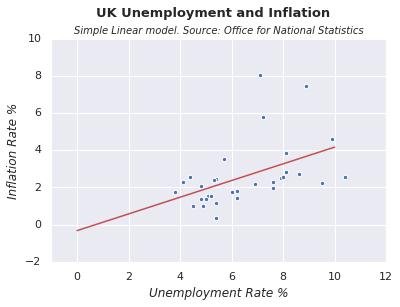

In [37]:
# Regressing inflation on unemployment.

x = merged['Unemployment']
y = merged['Inflation']
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])


plt.scatter(x, y)
plt.plot(xfit, yfit,'r-' );
plt.xlabel('Unemployment Rate %', style = 'italic', size = 12)
plt.ylabel('Inflation Rate %', style = 'italic', size = 12)
title_string = "UK Unemployment and Inflation"
subtitle_string = "Simple Linear model. Source: Office for National Statistics"
plt.suptitle(title_string, y=1.01, fontsize=13, weight = 'bold')
plt.title(subtitle_string, fontsize=10, style = 'italic')
plt.xlim([-1, 12])
plt.ylim([-2, 10])

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Looks like a polynomial model might fit the data more accurately.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


(0.0, 10.0)

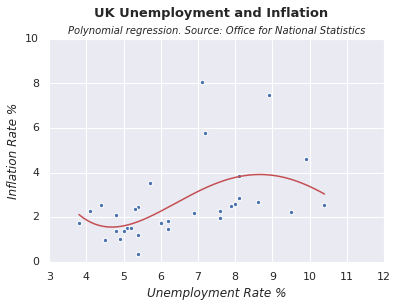

In [38]:
x = merged['Unemployment']
y = merged['Inflation']

# 4 polynomial features seemed to fit the data best.

poly_model = make_pipeline(PolynomialFeatures(4),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,'r-' );
plt.xlabel('Unemployment Rate %', style = 'italic', size = 12)
plt.ylabel('Inflation Rate %', style = 'italic', size = 12)
title_string = "UK Unemployment and Inflation"
subtitle_string = "Polynomial regression. Source: Office for National Statistics"
plt.suptitle(title_string, y=1.01, fontsize=13, weight = 'bold')
plt.title(subtitle_string, fontsize=10, style = 'italic')
plt.xlim([3, 12])
plt.ylim([0, 10])

Clearly this does not look like a phillips curve... However, it does look how we might intuitively expect. Very low unemployment leads to high growth and high inflation. High inflation leads economic instability and increased unemployment. Very high unemployment leads to low growth and low inflation.